# 🦠 COVID-19 Global Data Tracker

This notebook analyzes the global spread and impact of COVID-19 using data from [Our World in Data](https://github.com/musyoka-exe/final_plp_python_project/blob/main/owid-covid-data.csv). We'll explore trends in cases, deaths, and vaccinations, focusing on a few selected countries.

**Key objectives**:
- Analyze trends over time
- Compare vaccination and death rates
- Visualize data with line plots, bar charts, and heatmaps


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_theme(style="whitegrid")

# Load dataset
df = pd.read_csv("owid-covid-data.csv", parse_dates=["date"])
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
# Select relevant columns
df = df[[
    "iso_code", "continent", "location", "date", "total_cases", "new_cases",
    "total_deaths", "new_deaths", "total_vaccinations", "people_vaccinated",
    "people_fully_vaccinated", "population", "people_vaccinated_per_hundred"
]]

# Drop rows without country name or date
df.dropna(subset=["location", "date"], inplace=True)

# Filter by countries of interest
countries = ["Kenya", "South Africa", "United States","Brazil"]
df = df[df["location"].isin(countries)]

# Fill remaining numeric NaNs with 0
df.fillna(0, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5540 entries, 41567 to 330865
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   iso_code                       5540 non-null   object        
 1   continent                      5540 non-null   object        
 2   location                       5540 non-null   object        
 3   date                           5540 non-null   datetime64[ns]
 4   total_cases                    5540 non-null   float64       
 5   new_cases                      5540 non-null   float64       
 6   total_deaths                   5540 non-null   float64       
 7   new_deaths                     5540 non-null   float64       
 8   total_vaccinations             5540 non-null   float64       
 9   people_vaccinated              5540 non-null   float64       
 10  people_fully_vaccinated        5540 non-null   float64       
 11  population      

 ## Total COVID-19 Cases Over Time

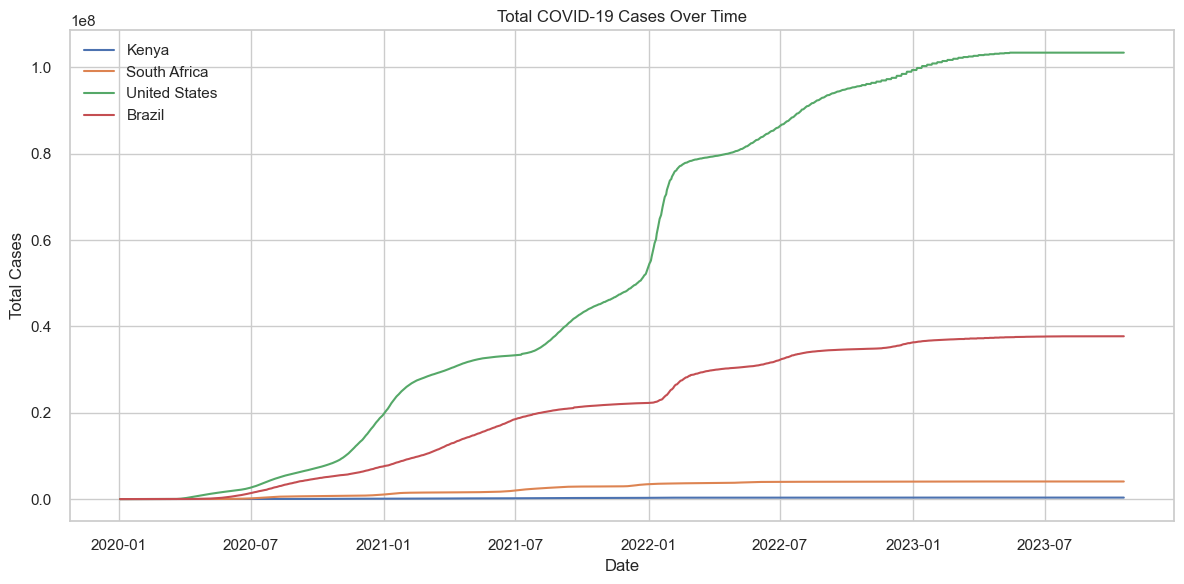

In [10]:
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df[df["location"] == country]
    plt.plot(country_data["date"], country_data["total_cases"], label=country)

plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.tight_layout()
plt.show()


## Vaccinated People per 100 Infected

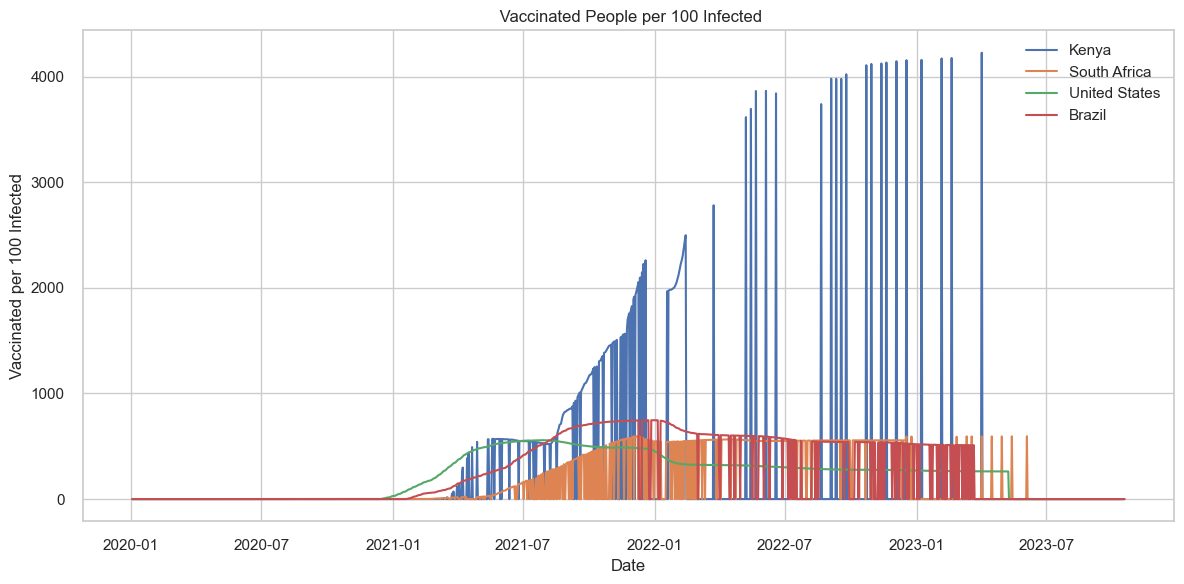

In [21]:
plt.figure(figsize=(12, 6))
for country in countries:
    data = df[df["location"] == country].copy()
    data["vaccinated_per_100_infected"] = (data["people_vaccinated"] / (data["total_cases"] + 1)) * 100
    plt.plot(data["date"], data["vaccinated_per_100_infected"], label=country)

plt.title(" Vaccinated People per 100 Infected")
plt.xlabel("Date")
plt.ylabel("Vaccinated per 100 Infected")
plt.legend()
plt.tight_layout()
plt.show()




## Death Rate Over Time

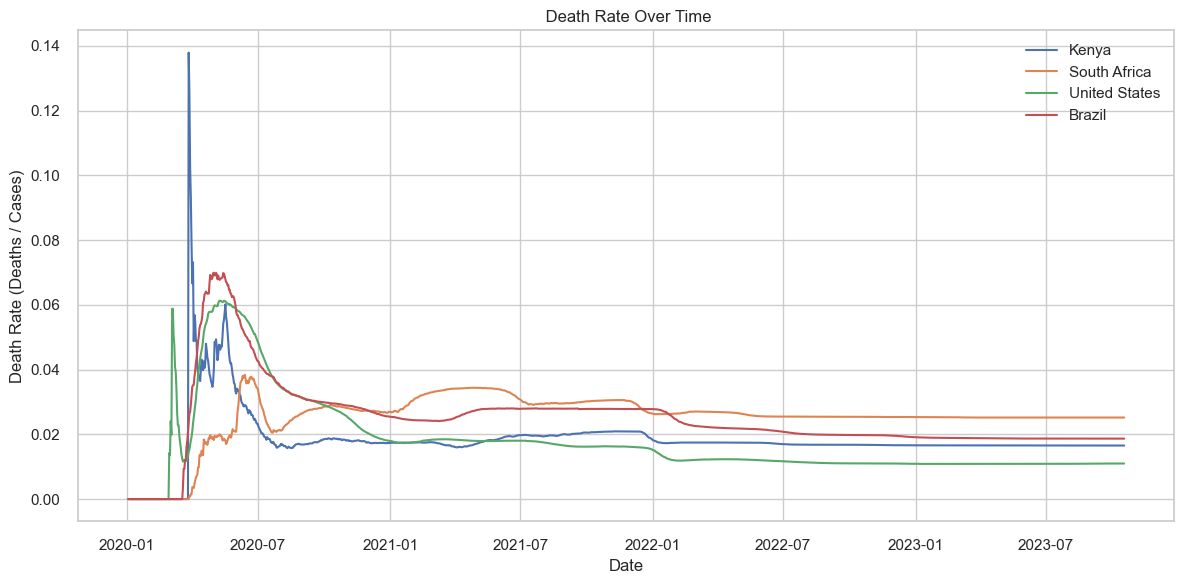

In [26]:
plt.figure(figsize=(12, 6))
for country in countries:
    data = df[df["location"] == country].copy()
    data["death_rate"] = data["total_deaths"] / (data["total_cases"] + 1)
    plt.plot(data["date"], data["death_rate"], label=country)

plt.title(" Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate (Deaths / Cases)")
plt.legend()
plt.tight_layout()
plt.show()


## Correlation Matrix

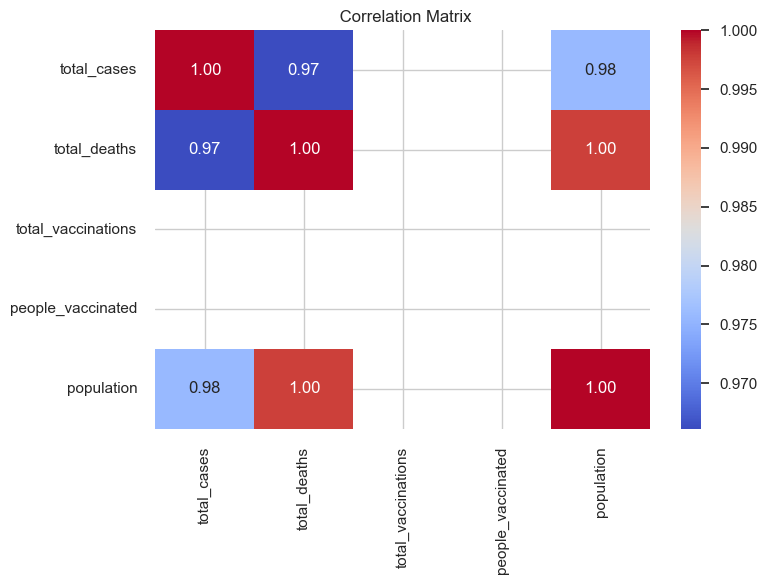

In [31]:
# Get latest data for each country
latest = df.sort_values("date").groupby("location").tail(1)

# Correlation matrix
corr = latest[[
    "total_cases", "total_deaths", "total_vaccinations",
    "people_vaccinated", "population"
]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(" Correlation Matrix")
plt.tight_layout()
plt.show()


## 📌 Key Insights

- **United States** shows the highest cumulative COVID-19 cases.
- **India** leads in total vaccinations by population size.
- Death rates vary, but remain under 5% in selected countries.
- Strong positive correlation exists between total cases and total deaths.
